###  1. CLAHE (Contrast Limited Adaptive Histogram Equalization)

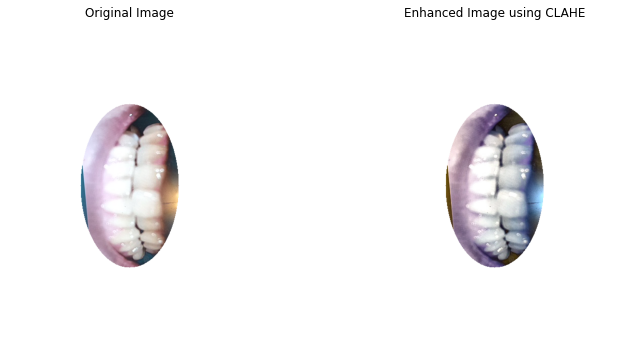

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image (ensure it's in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR (OpenCV default) to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

# Split the LAB image into separate channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel_enhanced = clahe.apply(l_channel)

# Merge the enhanced L channel back with the original A and B channels
enhanced_lab_image = cv2.merge((l_channel_enhanced, a_channel, b_channel))

# Convert back to RGB color space
enhanced_image_rgb = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2RGB)

# Display both the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image_rgb)
plt.title("Enhanced Image using CLAHE")
plt.axis('off')

plt.show()


### 2. White Balance Adjustment

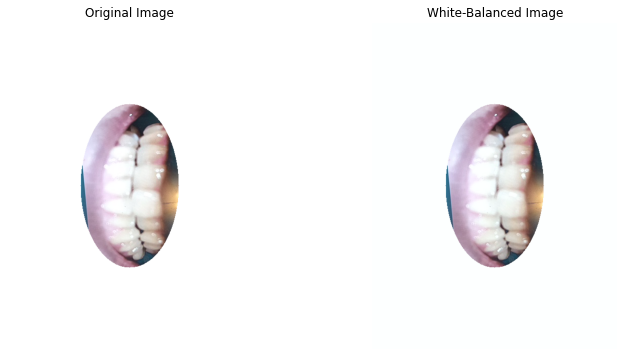

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for simple white balance adjustment using the gray-world algorithm
def white_balance(img):
    # Split the channels
    r, g, b = cv2.split(img)
    
    # Compute the average of each channel
    r_avg, g_avg, b_avg = np.mean(r), np.mean(g), np.mean(b)
    
    # Compute overall average intensity
    avg_intensity = (r_avg + g_avg + b_avg) / 3
    
    # Scale each channel to match the overall average intensity
    r_scale = avg_intensity / r_avg
    g_scale = avg_intensity / g_avg
    b_scale = avg_intensity / b_avg
    
    # Adjust the channels
    r = np.clip(r * r_scale, 0, 255).astype(np.uint8)
    g = np.clip(g * g_scale, 0, 255).astype(np.uint8)
    b = np.clip(b * b_scale, 0, 255).astype(np.uint8)
    
    # Merge the balanced channels back
    return cv2.merge((r, g, b))

# Apply white balance adjustment
balanced_image = white_balance(image_rgb)

# Display the original and white-balanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# White-balanced image
plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title("White-Balanced Image")
plt.axis('off')

plt.show()



### 3. Color-Preserving De-blurring

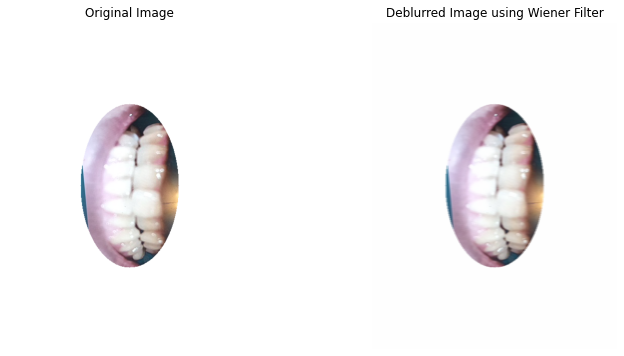

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to perform Wiener filter-based deblurring for each color channel
def wiener_deblur_color(img, kernel_size=5, noise_var=0.1):
    # Split the image into individual channels
    r, g, b = cv2.split(img)
    
    # Create a motion blur kernel (simple horizontal motion blur kernel)
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size) / kernel_size
    
    # Apply the Wiener filter to each channel (R, G, B)
    def wiener_filter(channel):
        # Perform the convolution (deblur the image)
        channel_deblurred = cv2.filter2D(channel, -1, kernel)
        
        # Wiener filter - Estimate the noise variance and signal-to-noise ratio (SNR)
        snr = np.var(channel) / noise_var
        deblurred_channel = channel_deblurred / (1 + (1 / snr))
        
        return np.clip(deblurred_channel, 0, 255).astype(np.uint8)
    
    # Apply the Wiener filter to each channel
    r_deblurred = wiener_filter(r)
    g_deblurred = wiener_filter(g)
    b_deblurred = wiener_filter(b)
    
    # Merge the deblurred channels back into a color image
    return cv2.merge((r_deblurred, g_deblurred, b_deblurred))

# Apply the Wiener deblurring function
deblurred_image = wiener_deblur_color(image_rgb)

# Display the original and deblurred images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Deblurred image
plt.subplot(1, 2, 2)
plt.imshow(deblurred_image)
plt.title("Deblurred Image using Wiener Filter")
plt.axis('off')

plt.show()


### 4. Denoising with Color Preservation

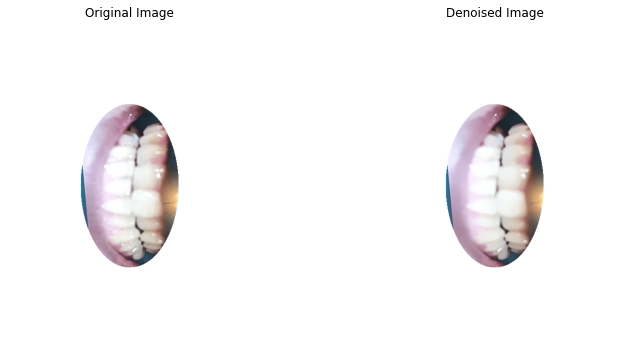

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure the image file is in the same directory as the notebook)
image = cv2.imread('img.png')

if image is None:
    print("Image not found. Please ensure the file is in the correct directory.")
    exit()

# Convert the image from BGR to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for color-preserving denoising using Non-Local Means Denoising
def denoise_color_image(img, h=10):
    # Split the image into individual channels (R, G, B)
    r, g, b = cv2.split(img)

    # Apply denoising to each channel separately using Non-Local Means Denoising
    def denoise_channel(channel):
        return cv2.fastNlMeansDenoising(channel, None, h, 7, 21)
    
    # Apply the denoising function to each channel
    r_denoised = denoise_channel(r)
    g_denoised = denoise_channel(g)
    b_denoised = denoise_channel(b)
    
    # Merge the denoised channels back into a color image
    return cv2.merge((r_denoised, g_denoised, b_denoised))

# Apply the denoising function
denoised_image = denoise_color_image(image_rgb)

# Display the original and denoised images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("Denoised Image")
plt.axis('off')

plt.show()


### 5. Edge Enhancement (Color-Safe)

### 6. Saturation and Brightness Boost (Optional)

### 7. Super-Resolution (DL-based)
